# Description


Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We are provided a dataset with information about the customers of a telecom company. There various features which describes the customer and there attachment with the company. 

We have to train a model which can predict whether with the given feature customer is likely to stay or leave with the company.

As we have our Target Variable(CHURN) with two categories, we will move ahead with classification approach.

Lets Begin...!!!

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [161]:
tel_churn=pd.read_csv('telecom_churn.csv')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Overview of Dataset

In [4]:
tel_churn.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   
5              Yes           Electronic check           99.65        820.5   
6              Yes    Credit card (automatic)           89.10       1949.4   
7               No               Mailed check           29.75        301.9   
8              Yes           Electronic check          104.80      3046.05   
9               No  Bank transfer (automatic)           56.15      3487.95   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes  
6    No  
7    No  
8   Yes  
9    No

In [5]:
tel_churn.tail(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7033  9767-FFLEM    Male              0      No         No      38   
7034  0639-TSIQW  Female              0      No         No      67   
7035  8456-QDAVC    Male              0      No         No      19   
7036  7750-EYXWZ  Female              0      No         No      12   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
7033          Yes                No     Fiber optic                   No   
7034          Yes               Yes     Fiber optic                  Yes   
7035          Yes                No     Fiber optic                   No   
7036           No  No phone service             DSL                   No   
7037          Yes                No              No  No internet service   
7038          Yes               Yes             DSL                  Yes   
7039          Yes               Yes     Fiber optic                   No   
7040           No  No phone service             DSL                  Yes   
7041          Yes               Yes     Fiber optic                   No   
7042          Yes                No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
7033                   No                   No                   No   
7034                  Yes                  Yes                   No   
7035                   No                   No                   No   
7036                  Yes                  Yes                  Yes   
7037  No internet service  No internet service  No internet service   
7038                   No                  Yes                  Yes   
7039                  Yes                  Yes                   No   
7040                   No                   No                   No   
7041                   No                   No                   No   
7042                   No                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
7033                   No                   No  Month-to-month   
7034                  Yes                   No  Month-to-month   
7035                  Yes                   No  Month-to-month   
7036                  Yes                  Yes        One year   
7037  No internet service  No internet service        Two year   
7038                  Yes                  Yes        One year   
7039                  Yes                  Yes        One year   
7040                   No                   No  Month-to-month   
7041                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
7033              Yes    Credit card (automatic)           69.50      2625.25   
7034              Yes    Credit card (automatic)          102.95      6886.25   
7035              Yes  Bank transfer (automatic)           78.70       1495.1   
7036               No           Electronic check           60.65        743.3   
7037              Yes  Bank transfer (automatic)           21.15       1419.4   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5  

In [6]:
tel_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
tel_churn.shape

(7043, 21)

In [8]:
tel_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Checking Null values

In [9]:
tel_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

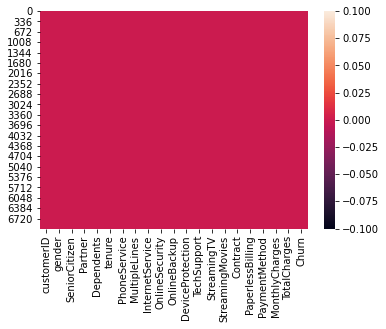

In [10]:
sns.heatmap(tel_churn.isnull())

No Null values found. We will check for any unusual entries in the unique values ahead.

In [11]:
for i in tel_churn.iloc[:,1:]:
    if tel_churn[i].dtypes=="O":
        print(i.upper())
        print(tel_churn[i].unique(),'\n')

GENDER
['Female' 'Male'] 

PARTNER
['Yes' 'No'] 

DEPENDENTS
['No' 'Yes'] 

PHONESERVICE
['No' 'Yes'] 

MULTIPLELINES
['No phone service' 'No' 'Yes'] 

INTERNETSERVICE
['DSL' 'Fiber optic' 'No'] 

ONLINESECURITY
['No' 'Yes' 'No internet service'] 

ONLINEBACKUP
['Yes' 'No' 'No internet service'] 

DEVICEPROTECTION
['No' 'Yes' 'No internet service'] 

TECHSUPPORT
['No' 'Yes' 'No internet service'] 

STREAMINGTV
['No' 'Yes' 'No internet service'] 

STREAMINGMOVIES
['No' 'Yes' 'No internet service'] 

CONTRACT
['Month-to-month' 'One year' 'Two year'] 

PAPERLESSBILLING
['Yes' 'No'] 

PAYMENTMETHOD
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

TOTALCHARGES
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 

CHURN
['No' 'Yes'] 



Total Charges should be an integer or float type column but python is identifying it as a Object type.

We need to find out the entry or the data which is causing it do so.

For it we follow a rather unusual method. We will try to convert the Total Charges column to a float64 type. Pyhton will give an error showing which data it could not convert to float type.

In [22]:
tel_churn['TotalCharges']=tel_churn['TotalCharges'].astype('float64')

ValueError: could not convert string to float: ''

As we see in the error it shows there is a blank entry with a 'SPACE' which it cannot convert to float. Lets Check the rows with this entry

In [23]:
tel_churn[tel_churn['TotalCharges']==" "]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85             

replacing unusual entry with nan value

In [162]:
tel_churn['TotalCharges']=tel_churn['TotalCharges'].replace(' ',np.nan)

In [163]:
# Converting the column to Float type

tel_churn['TotalCharges']=tel_churn['TotalCharges'].astype('float64')

In [26]:
tel_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Filling Null Values

In [164]:
# We will fill the NaN values with mean of the column

tel_churn['TotalCharges']=tel_churn['TotalCharges'].fillna(tel_churn['TotalCharges'].mean())

# Exploring Categorical Columns

In [166]:
data_cat=pd.DataFrame()
for i in tel_churn.iloc[:,1:]:
    if tel_churn[i].dtypes=='O':
        data_cat[i]=tel_churn[i].copy()

In [167]:
data_cat.head()

gender Partner Dependents PhoneService     MultipleLines InternetService  \
0  Female     Yes         No           No  No phone service             DSL   
1    Male      No         No          Yes                No             DSL   
2    Male      No         No          Yes                No             DSL   
3    Male      No         No           No  No phone service             DSL   
4  Female      No         No          Yes                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# Visualizing Value Count

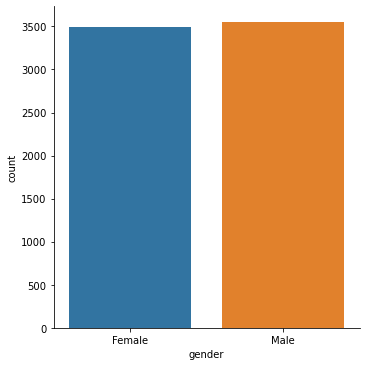

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

In [59]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='gender',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['gender'].value_counts(normalize=True)*100

We have almost similar count for both male and female which is 50.4% and 49.5% respectively.

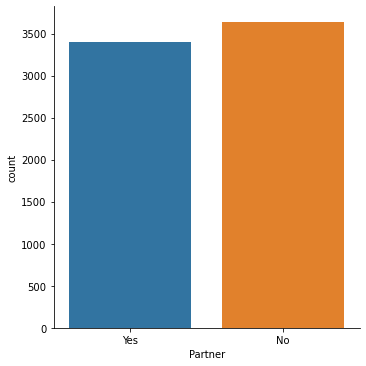

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

In [61]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Partner',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['Partner'].value_counts(normalize=True)*100

51.6% of the customers have No Partner while 48.3% have it.

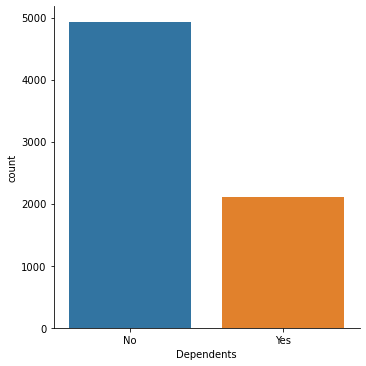

No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

In [62]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Dependents',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['Dependents'].value_counts(normalize=True)*100

70% customers has no dependents while only 29.9% have dependents

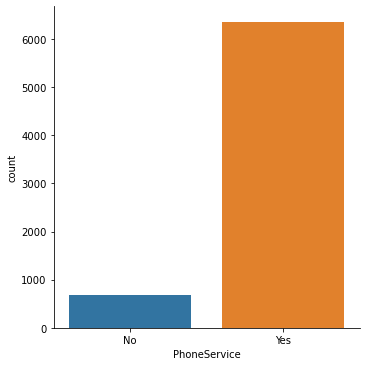

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

In [63]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='PhoneService',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['PhoneService'].value_counts(normalize=True)*100

90.3% Customers have phone service with them while only 9.6% use other services.

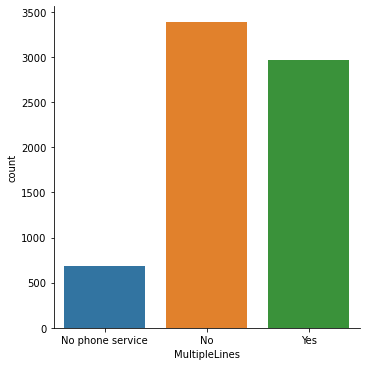

No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64

In [64]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='MultipleLines',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['MultipleLines'].value_counts(normalize=True)*100

As for the customers having phone services, 48.1% have only single line with them while 42.1 opted for multiple lines.

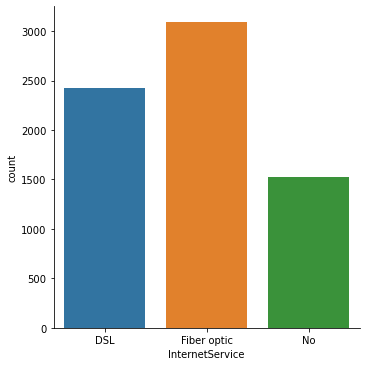

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

In [65]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='InternetService',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['InternetService'].value_counts(normalize=True)*100

Customers using fibre optic are at 43.9% while for DSL its 34.3%.

It means 78.2% of all the customers uses Internet Services and only 21.6 don't.

Also high percentage of fibre optic shows importance of high bandwidth requirement.

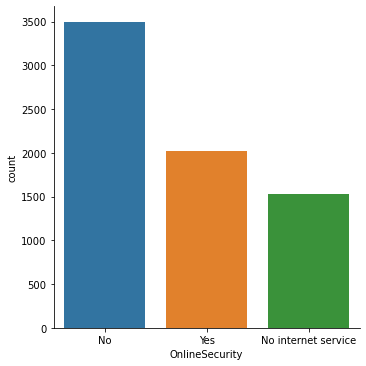

No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64

In [101]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='OnlineSecurity',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['OnlineSecurity'].value_counts(normalize=True)*100

Out of 78.2% internet users, 49.6% users didnt have online security while only 28.6 are secured

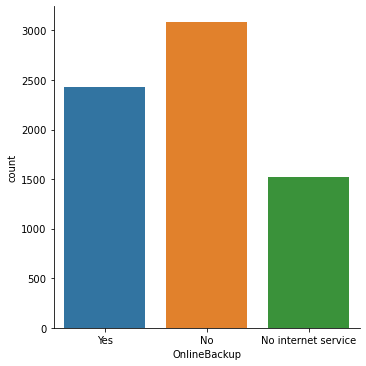

No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: OnlineBackup, dtype: float64

In [105]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='OnlineBackup',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['OnlineBackup'].value_counts(normalize=True)*100

Out of all the internet users only 34.4% has the Online backup facility available.

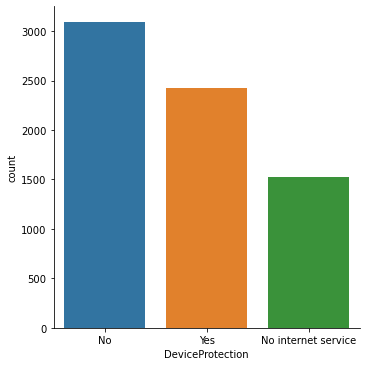

No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: DeviceProtection, dtype: float64

In [68]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='DeviceProtection',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['DeviceProtection'].value_counts(normalize=True)*100

43.9% of internet users doesn't have any device protection and only 34.3% have it. 

Lack of Online security and device protection could result in compromise of data and privacy.

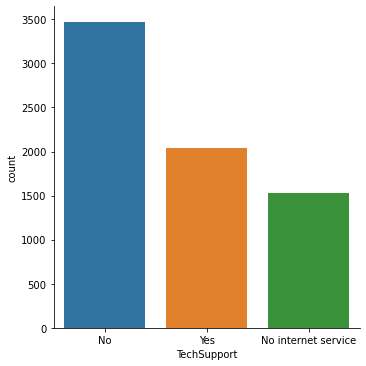

No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: TechSupport, dtype: float64

In [69]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='TechSupport',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['TechSupport'].value_counts(normalize=True)*100

Only 29.0% internet users opt for Technical Support.

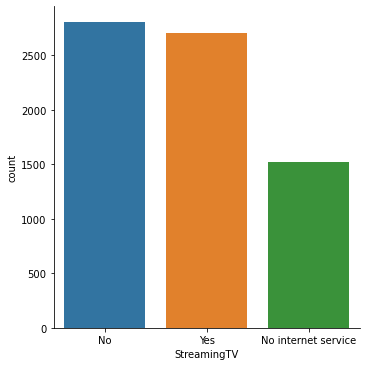

No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: StreamingTV, dtype: float64

In [70]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='StreamingTV',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['StreamingTV'].value_counts(normalize=True)*100

We have almost similar numbers in terms of users Streaming TV through internet

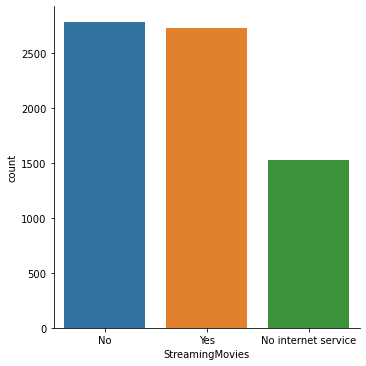

No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: StreamingMovies, dtype: float64

In [71]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='StreamingMovies',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['StreamingMovies'].value_counts(normalize=True)*100

Same is with Streaming movies

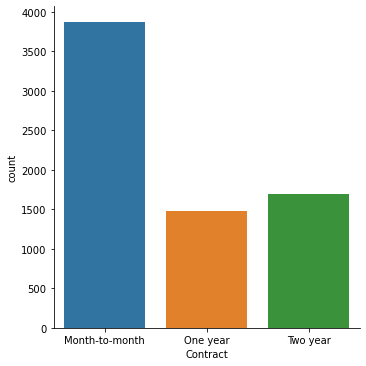

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64

In [72]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Contract',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['Contract'].value_counts(normalize=True)*100

M to M users are more i.e 55%. From One and two year contract we see more customers going for two year contract

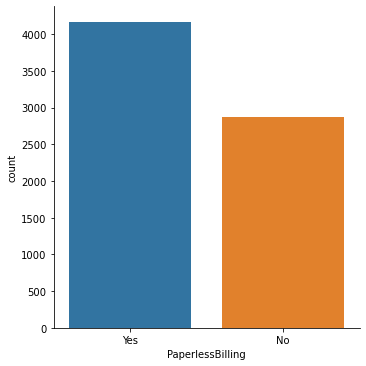

Yes    59.221922
No     40.778078
Name: PaperlessBilling, dtype: float64

In [73]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='PaperlessBilling',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['PaperlessBilling'].value_counts(normalize=True)*100

59.2% opt for paperless billing.

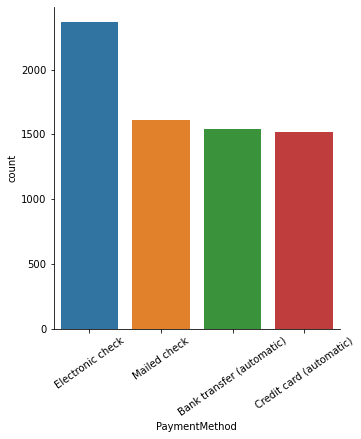

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64

In [75]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='PaymentMethod',data=data_cat,kind='count',ax=ax)
plt.xticks(rotation=35)
plt.show()

data_cat['PaymentMethod'].value_counts(normalize=True)*100

33.5% users uses Electronic Cheques for their payments. While the other three methods have almost similar distribution. 

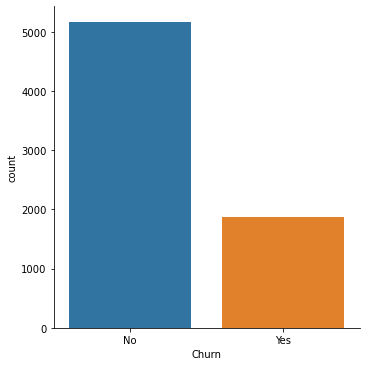

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [76]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

data_cat['Churn'].value_counts(normalize=True)*100

Talking about our target varible, We see 73.4% customers staying with the company and 26.5% leaving them. We will try to figure ut what's causing these 26% to leave.

# Bivariate Analysis

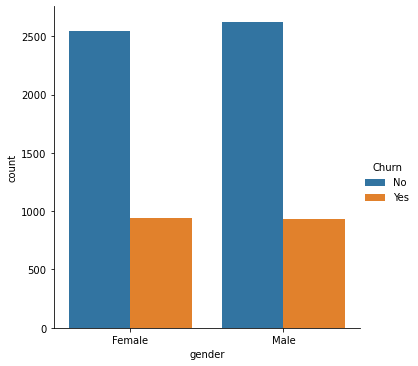

In [85]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='gender',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

We dont see any specific pattern for churn with respect to Gender.

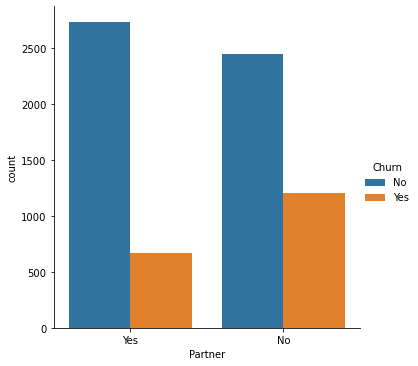

Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669

In [112]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Partner',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['Partner'],data_cat['Churn'])

Customer having partner with them are less likely to leave while the customer without partner have high percentage of churn.

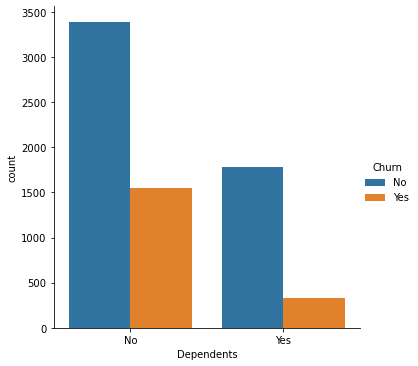

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326

In [113]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Dependents',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['Dependents'],data_cat['Churn'])

Customer with no dependents show higher rate of churn which is 31.2% while one with dependents are 15.4%.

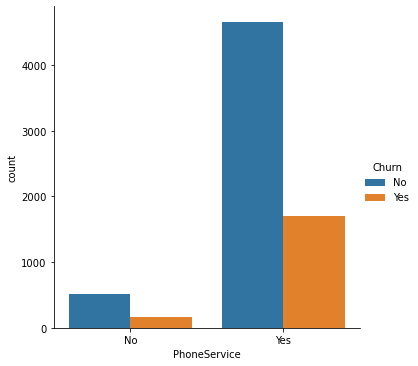

Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699

In [114]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='PhoneService',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['PhoneService'],data_cat['Churn'])

Nothing Specific

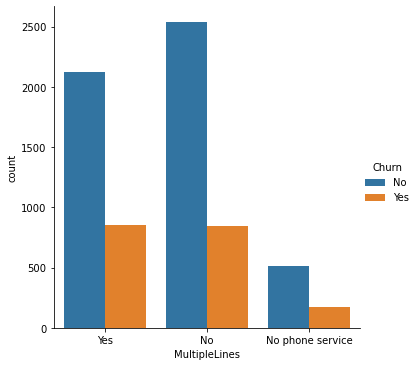

Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850

In [117]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='MultipleLines',hue='Churn',data=data_cat,kind='count',ax=ax,order=('Yes','No','No phone service'))
plt.show()

pd.crosstab(data_cat['MultipleLines'],data_cat['Churn'])

Customer with both multiple line or not show similar percentage for churn.

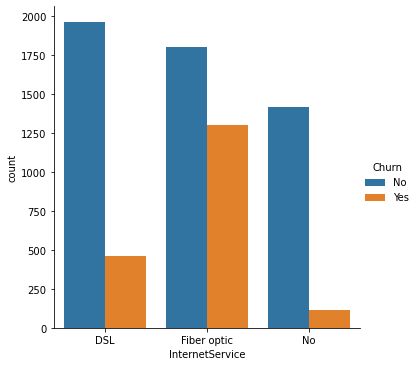

Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113

In [118]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='InternetService',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['InternetService'],data_cat['Churn'])

Surprisingly, 41.8% of Fibre optic users leave the company and only 18% of those using DSL. 

This might show that the fibre optic services are not up to the mark and customers are not pleased by the service.

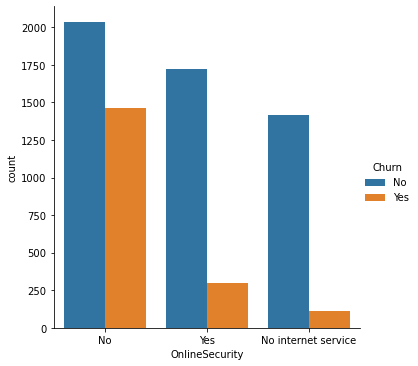

Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295

In [119]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='OnlineSecurity',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['OnlineSecurity'],data_cat['Churn'])

Again 41.7% of customers not having Online security leaves.

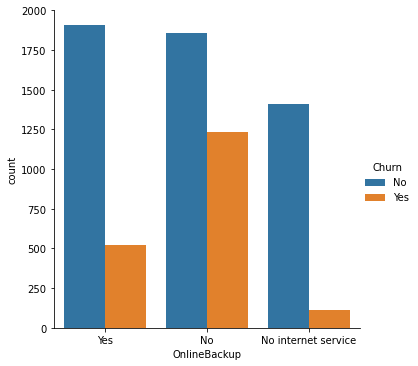

Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523

In [121]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='OnlineBackup',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['OnlineBackup'],data_cat['Churn'])

Similar pattern is observed with Online Backup facility

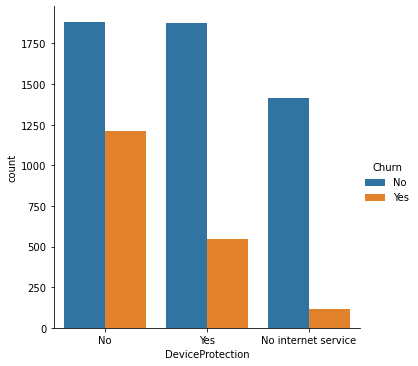

Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545

In [122]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='DeviceProtection',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['DeviceProtection'],data_cat['Churn'])

Simlar as Online Security and Online Backup

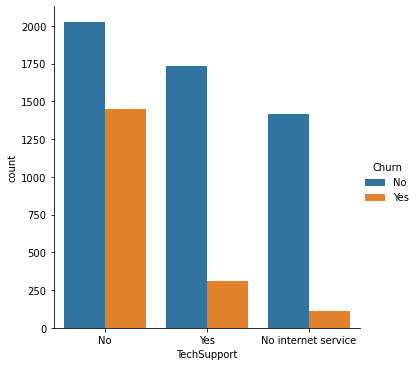

Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310

In [123]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='TechSupport',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['TechSupport'],data_cat['Churn'])

Here we see customers not opting for technical support show higher churn percentage i.e 41.6%. 

This could be because as they are not getting technical support they don't get there queries and issues resolved or either they are unable to understand something and are not comfortable in continuing the services. 

More efforts are needed to reach to the customer so that we can have an insight of their problem. This could make customer more comfortable while doing business with the company.

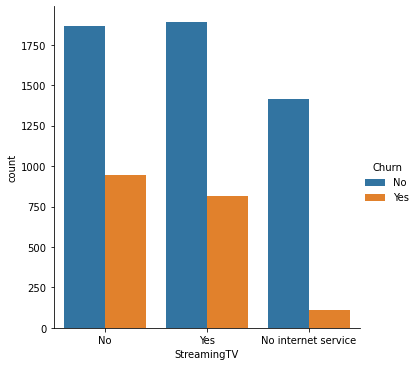

Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814

In [125]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='StreamingTV',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['StreamingTV'],data_cat['Churn'])

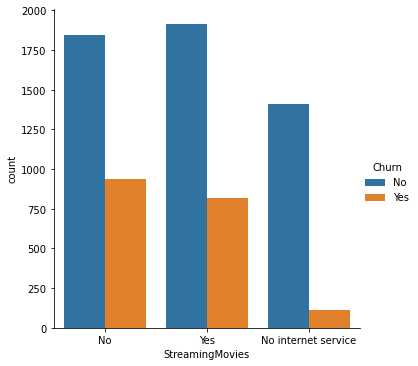

Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818

In [124]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='StreamingMovies',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['StreamingMovies'],data_cat['Churn'])

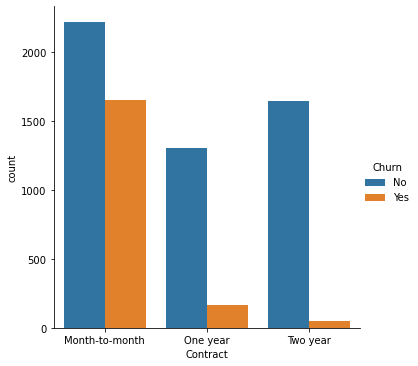

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

In [126]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='Contract',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['Contract'],data_cat['Churn'])

M2M users show higher churn rate.42.7% leaves. while customer with 2 year contract are very likely to stay.

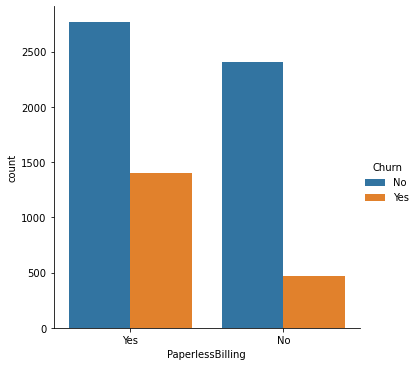

Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400

In [127]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='PaperlessBilling',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.show()

pd.crosstab(data_cat['PaperlessBilling'],data_cat['Churn'])

Customers who have paperless billing are more likely to leave.33.5% of them leaves.

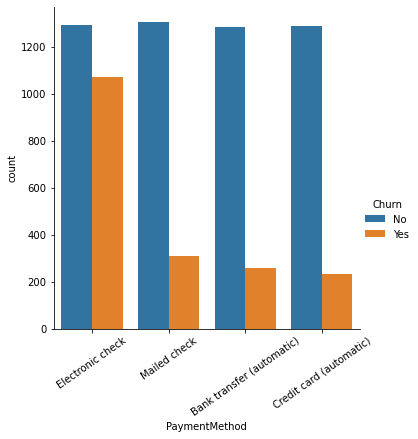

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308

In [128]:
fig, ax=sns.figsize=(12,10)
sns.catplot(x='PaymentMethod',hue='Churn',data=data_cat,kind='count',ax=ax)
plt.xticks(rotation=35)
plt.show()

pd.crosstab(data_cat['PaymentMethod'],data_cat['Churn'])

45% of customers who pay there bills by electronic cheques leaves the company. 

This could be because either customer is facing issues with electronic cheque payment 

# Exploring numerical columns

In [149]:
data_num=pd.DataFrame()
for i in tel_churn.iloc[:,1:]:
    if tel_churn[i].dtypes!='O':
        data_num[i]=tel_churn[i].copy()

In [150]:
data_num.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2265.000258
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1400.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [130]:
data_num.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0              0       1           29.85         29.85
1              0      34           56.95       1889.50
2              0       2           53.85        108.15
3              0      45           42.30       1840.75
4              0       2           70.70        151.65

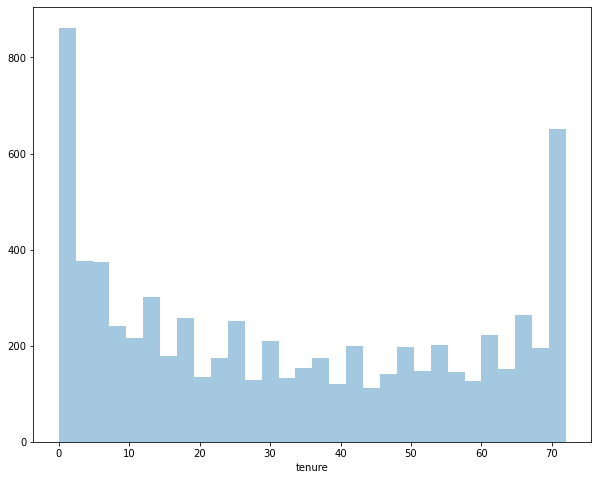

In [151]:
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(data_num['tenure'],kde=False, bins=30,ax=ax)
plt.show()

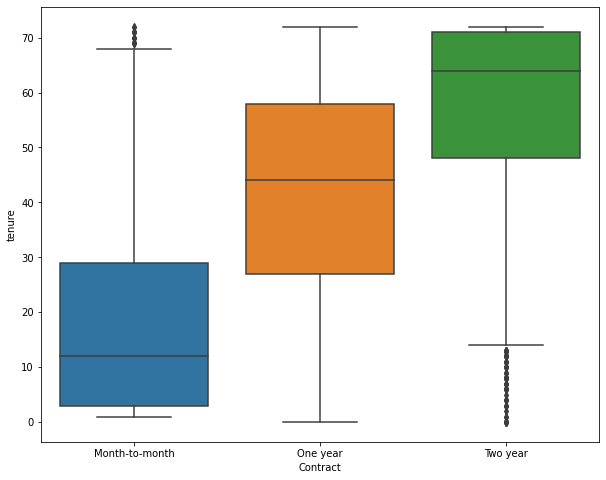

In [152]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(x=data_cat['Contract'],y=data_num['tenure'],ax=ax)
plt.show()

We see most customers are in M2M category and also it has high churn rate. Customers with two year contract stay with the company for almost 50 to 70 months.

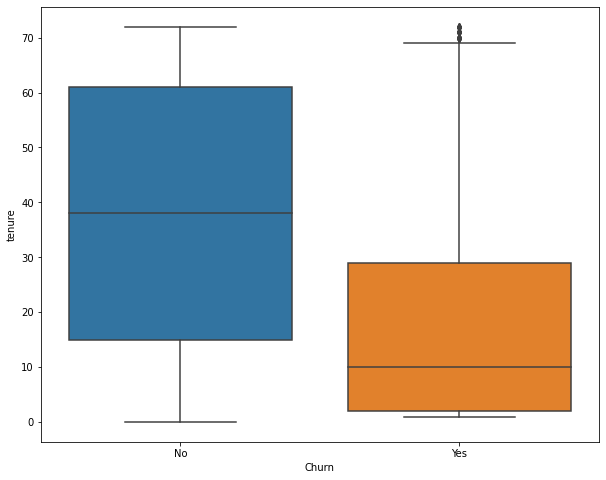

In [153]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(x=data_cat['Churn'],y=data_num['tenure'],ax=ax)
plt.show()

Long Term customer are less ikely to leave.

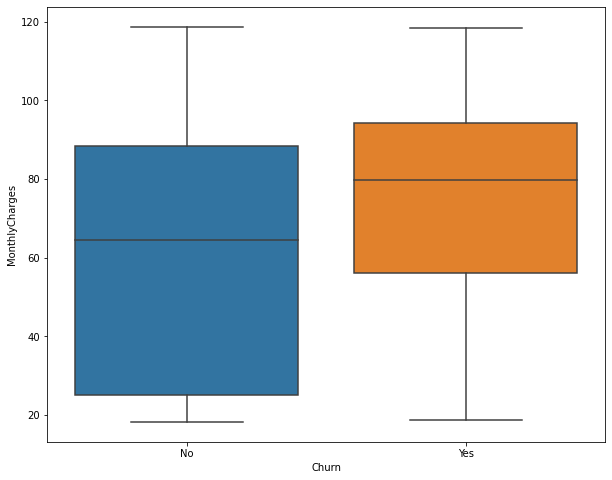

In [154]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(x=data_cat['Churn'],y=data_num['MonthlyCharges'],ax=ax)
plt.show()

Customer with low monthly charges are very likely to stay while one paying high amount monthly are more likely to leave.

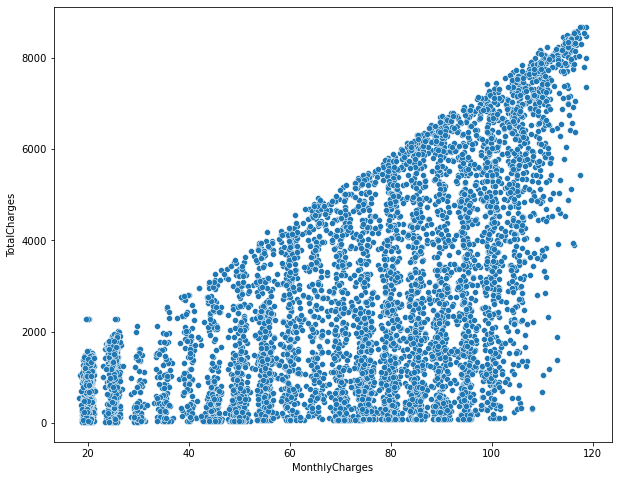

In [155]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x=data_num['MonthlyCharges'],y=data_num['TotalCharges'],ax=ax)
plt.show()

With increase in monthly charges, Total charges increases.

For correlation we will add churn to numerical dataframe and encode it

In [172]:
data_num['Churn']=tel_churn['Churn'].copy()

In [173]:
# Using Ordinal Encoder for changing string values
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [174]:
data_num['Churn']=oe.fit_transform(data_num['Churn'].values.reshape(-1,1))

In [175]:
data_num.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn
0              0       1           29.85         29.85    0.0
1              0      34           56.95       1889.50    0.0
2              0       2           53.85        108.15    1.0
3              0      45           42.30       1840.75    0.0
4              0       2           70.70        151.65    1.0

# Checking Correlation

In [176]:
data_num_cor=data_num.corr()

In [177]:
data_num_cor

SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.016567        0.220173      0.102395   
tenure               0.016567  1.000000        0.247900      0.824757   
MonthlyCharges       0.220173  0.247900        1.000000      0.650468   
TotalCharges         0.102395  0.824757        0.650468      1.000000   
Churn                0.150889 -0.352229        0.193356     -0.199428   

                   Churn  
SeniorCitizen   0.150889  
tenure         -0.352229  
MonthlyCharges  0.193356  
TotalCharges   -0.199428  
Churn           1.000000

<AxesSubplot:>

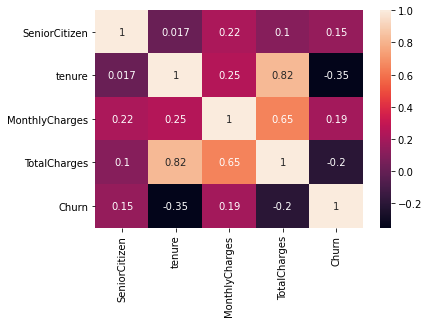

In [178]:
sns.heatmap(data_num_cor,annot=True)

We see correlation between Total Charges and Tenure. As the tenure increses so the Total Charges.

Also higher the monthly charge, higher the Total Charge. We see 0.65 correlation between them

# Checking Outliers

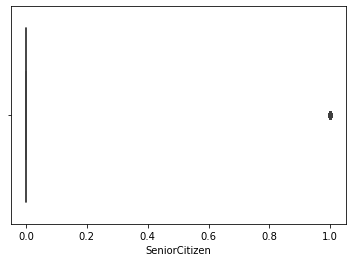

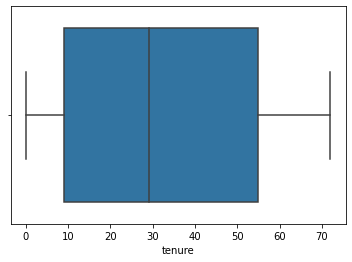

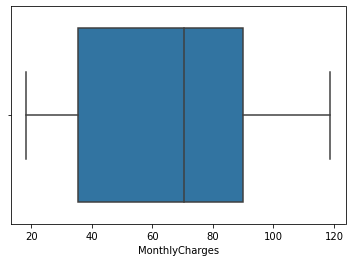

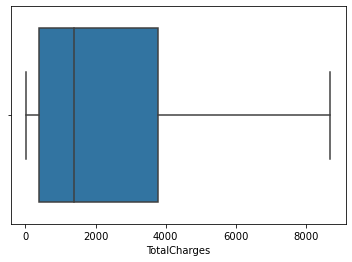

In [179]:
for i in tel_churn.columns:
    if tel_churn[i].dtypes!='O':
        sns.boxplot(tel_churn[i])
        plt.show()

No Outliers detected. 

# Checking Skewness

In [56]:
tel_churn.skew().sort_values(ascending=False)

SeniorCitizen     1.833633
TotalCharges      0.962394
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

We see some skewness in Total Charges column. We will correct it.

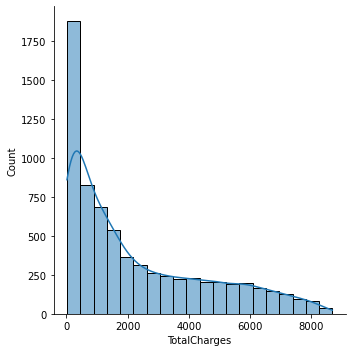

In [180]:
# Checking density of distribution

sns.displot(tel_churn['TotalCharges'],kde=True,bins=20)

# Skewness Correction

In [181]:
from sklearn.preprocessing import power_transform

In [182]:
tel_churn['TotalCharges']=power_transform(tel_churn['TotalCharges'].values.reshape(-1,1))

In [183]:
tel_churn.skew().sort_values(ascending=False)

SeniorCitizen     1.833633
tenure            0.239540
TotalCharges     -0.144899
MonthlyCharges   -0.220524
dtype: float64

# Encoding

In [184]:
# Using Ordinal Encoder for changing string values
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in tel_churn.iloc[:,1:]:
    if tel_churn[i].dtypes=='object':
        tel_churn[i]=oe.fit_transform(tel_churn[i].values.reshape(-1,1))


# Splitting Input Features and Target Variable

We wil be dropping Customer ID column as it only denotes a particular customer entry.

In [185]:
x=tel_churn.drop(['customerID','Churn'],axis=1)
y=tel_churn['Churn']
print(x.head(10))
print(y.head(10))
print(x.shape)
print(y.shape)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     0.0              0      1.0         0.0       1           0.0   
1     1.0              0      0.0         0.0      34           1.0   
2     1.0              0      0.0         0.0       2           1.0   
3     1.0              0      0.0         0.0      45           0.0   
4     0.0              0      0.0         0.0       2           1.0   
5     0.0              0      0.0         0.0       8           1.0   
6     1.0              0      0.0         1.0      22           1.0   
7     0.0              0      0.0         0.0      10           0.0   
8     0.0              0      1.0         0.0      28           1.0   
9     1.0              0      0.0         1.0      62           1.0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0            1.0              0.0             0.0           2.0   
1            0.0              0.0             2.0           0.0   
2            0.0 

# Scaling

In [186]:
# Using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [187]:
x_new=mms.fit_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        0.0            0.0      1.0         0.0  0.013889           0.0   
1        1.0            0.0      0.0         0.0  0.472222           1.0   
2        1.0            0.0      0.0         0.0  0.027778           1.0   
3        1.0            0.0      0.0         0.0  0.625000           0.0   
4        0.0            0.0      0.0         0.0  0.027778           1.0   
5        0.0            0.0      0.0         0.0  0.111111           1.0   
6        1.0            0.0      0.0         1.0  0.305556           1.0   
7        0.0            0.0      0.0         0.0  0.138889           0.0   
8        0.0            0.0      1.0         0.0  0.388889           1.0   
9        1.0            0.0      0.0         1.0  0.861111           1.0   
10       1.0            0.0      1.0         1.0  0.180556           1.0   
11       1.0            0.0      0.0         0.0  0.222222           1.0   
12       1.0            0.0      1.0         0.0  0.805556           1.0   
13       1.0            0.0      0.0         0.0  0.680556           1.0   
14       1.0            0.0      0.0         0.0  0.347222           1.0   
15       0.0            0.0      1.0         1.0  0.958333           1.0   
16       0.0            0.0      0.0         0.0  0.722222           1.0   
17       1.0            0.0      0.0         1.0  0.986111           1.0   
18       0.0            0.0      1.0         1.0  0.138889           1.0   
19       0.0            0.0      0.0         0.0  0.291667           1.0   
20       1.0            1.0      0.0         0.0  0.013889           0.0   
21       1.0            0.0      1.0         0.0  0.166667           1.0   
22       1.0            0.0      0.0         0.0  0.013889           1.0   
23       0.0            0.0      1.0         0.0  0.805556           1.0   
24       1.0            0.0      1.0         1.0  0.680556           1.0   
25       0.0            0.0      0.0         0.0  0.416667           1.0   
26       1.0            0.0      1.0         1.0  0.652778           1.0   
27       1.0            0.0      1.0         1.0  0.013889           0.0   
28       1.0            0.0      1.0         0.0  1.000000           1.0   
29       0.0            0.0      0.0         1.0  0.236111           1.0   
30       0.0            1.0      1.0         0.0  0.986111           1.0   
31       1.0            1.0      1.0         0.0  0.027778           1.0   
32       0.0            0.0      1.0         1.0  0.375000           1.0   
33       1.0            0.0      0.0         0.0  0.013889           1.0   
34       1.0            1.0      0.0         0.0  0.013889           1.0   
35       0.0            0.0      1.0         1.0  1.000000           1.0   
36       1.0            0.0      0.0         0.0  0.069444           1.0   
37       0.0            0.0      0.0         0.0  0.638889           1.0   
38       1.0            0.0      0.0         0.0  0.472222           1.0   
39       0.0            0.0      0.0         0.0  0.152778           1.0   
40       1.0            0.0      1.0         1.0  0.138889           1.0   
41       0.0            0.0      1.0         1.0  0.972222           1.0   
42       0.0            0.0      1.0         1.0  0.236111           1.0   
43       0.0            0.0      0.0         0.0  0.875000           1.0   
44       0.0            0.0      1.0         0.0  0.180556           1.0   
45       0.0            0.0      0.0         0.0  0.680556           1.0   
46       1.0            0.0      0.0         0.0  0.027778           1.0   
47       0.0            0.0      0.0         0.0  0.027778           1.0   
48       1.0            0.0      0.0         0.0  0.722222           1.0   
49       0.0            0.0      1.0         1.0  0.958333           1.0   
50       0.0            1.0      0.0         0.0  0.597222           1.0   
51       0.0            0.0      0.0         0.0  0.20

# Creating Train Test Split

In [188]:
# Importing Classification Algorithms
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [69]:
# Finding Best Random State

maxAccu=0
maxRs=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lrpred=lr.predict(x_test)
    acc=accuracy_score(y_test,lrpred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best Accuracy Score is : ', maxAccu, ' when Random state is : ',maxRs)

Best Accuracy Score is :  0.8253763440860215  when Random state is :  129


In [70]:
# Using Random State 129

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=129)

In [71]:
# Defining Model List
model_list=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),GaussianNB(),XGBClassifier()]

In [72]:
# Creating For loop to print Training and Test accuracy score
for m in model_list:
    model=m
    model.fit(x_train,y_train)
    model_pred_train=model.predict(x_train)
    model_pred=model.predict(x_test)
    print('Training Accuracy for the model ',m,' is: ',accuracy_score(y_train,model_pred_train)*100)
    print('Testing Accuracy for the model ',m,' is: ',accuracy_score(y_test,model_pred)*100)
    print('\n')
    

Training Accuracy for the model  LogisticRegression()  is:  79.88554472233997
Testing Accuracy for the model  LogisticRegression()  is:  82.53763440860214


Training Accuracy for the model  SVC()  is:  81.62356930902925
Testing Accuracy for the model  SVC()  is:  81.16129032258065


Training Accuracy for the model  DecisionTreeClassifier()  is:  99.76685036032217
Testing Accuracy for the model  DecisionTreeClassifier()  is:  73.24731182795699


Training Accuracy for the model  KNeighborsClassifier()  is:  82.28062738448494
Testing Accuracy for the model  KNeighborsClassifier()  is:  77.29032258064517


Training Accuracy for the model  RandomForestClassifier()  is:  99.74565493853328
Testing Accuracy for the model  RandomForestClassifier()  is:  80.08602150537635


Training Accuracy for the model  GradientBoostingClassifier()  is:  82.7893175074184
Testing Accuracy for the model  GradientBoostingClassifier()  is:  81.6774193548387


Training Accuracy for the model  AdaBoostClassifier() 

# Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
# Logistic Regression

lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
testing_accu=accuracy_score(y_test,lr_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(LogisticRegression(),x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 80.49123930869234 and the accuracy for testing is 82.53763440860214 


At crossfold 3 the CV score of is 80.7042748157724 and the accuracy for testing is 82.53763440860214 


At crossfold 4 the CV score of is 80.6900940839399 and the accuracy for testing is 82.53763440860214 


At crossfold 5 the CV score of is 80.71846369120588 and the accuracy for testing is 82.53763440860214 


At crossfold 6 the CV score of is 80.6191068877493 and the accuracy for testing is 82.53763440860214 


At crossfold 7 the CV score of is 80.71841331074413 and the accuracy for testing is 82.53763440860214 


At crossfold 8 the CV score of is 80.60497497678259 and the accuracy for testing is 82.53763440860214 


At crossfold 9 the CV score of is 80.59067779109719 and the accuracy for testing is 82.53763440860214 




In [75]:
# SVC

svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
testing_accu=accuracy_score(y_test,svc_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 79.78133470613005 and the accuracy for testing is 81.16129032258065 


At crossfold 3 the CV score of is 80.13640959606994 and the accuracy for testing is 81.16129032258065 


At crossfold 4 the CV score of is 80.0228514919209 and the accuracy for testing is 81.16129032258065 


At crossfold 5 the CV score of is 79.89506379443834 and the accuracy for testing is 81.16129032258065 


At crossfold 6 the CV score of is 79.95190867004284 and the accuracy for testing is 81.16129032258065 


At crossfold 7 the CV score of is 79.696244437193 and the accuracy for testing is 81.16129032258065 


At crossfold 8 the CV score of is 79.88097848519244 and the accuracy for testing is 81.16129032258065 


At crossfold 9 the CV score of is 79.8810471307556 and the accuracy for testing is 81.16129032258065 




In [76]:
# DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
testing_accu=accuracy_score(y_test,dtc_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 72.62531729393251 and the accuracy for testing is 73.41935483870968 


At crossfold 3 the CV score of is 72.42665071725186 and the accuracy for testing is 73.41935483870968 


At crossfold 4 the CV score of is 73.13655883795364 and the accuracy for testing is 73.41935483870968 


At crossfold 5 the CV score of is 72.4690201787212 and the accuracy for testing is 73.41935483870968 


At crossfold 6 the CV score of is 73.16462397120911 and the accuracy for testing is 73.41935483870968 


At crossfold 7 the CV score of is 73.32125843322814 and the accuracy for testing is 73.41935483870968 


At crossfold 8 the CV score of is 73.53390065524714 and the accuracy for testing is 73.41935483870968 


At crossfold 9 the CV score of is 72.88055318745856 and the accuracy for testing is 73.41935483870968 




In [77]:
# KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
testing_accu=accuracy_score(y_test,knn_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 75.5075130461653 and the accuracy for testing is 77.29032258064517 


At crossfold 3 the CV score of is 75.74896559867042 and the accuracy for testing is 77.29032258064517 


At crossfold 4 the CV score of is 75.83425287801353 and the accuracy for testing is 77.29032258064517 


At crossfold 5 the CV score of is 75.73477522743404 and the accuracy for testing is 77.29032258064517 


At crossfold 6 the CV score of is 75.7774418065377 and the accuracy for testing is 77.29032258064517 


At crossfold 7 the CV score of is 75.84828664556849 and the accuracy for testing is 77.29032258064517 


At crossfold 8 the CV score of is 75.83394064080073 and the accuracy for testing is 77.29032258064517 


At crossfold 9 the CV score of is 75.59283176131615 and the accuracy for testing is 77.29032258064517 




# Ensemble Techniques

In [78]:
# RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
testing_accu=accuracy_score(y_test,rfc_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 78.56023992332209 and the accuracy for testing is 80.34408602150538 


At crossfold 3 the CV score of is 79.24178340201115 and the accuracy for testing is 80.34408602150538 


At crossfold 4 the CV score of is 79.08576286717258 and the accuracy for testing is 80.34408602150538 


At crossfold 5 the CV score of is 79.11402550164526 and the accuracy for testing is 80.34408602150538 


At crossfold 6 the CV score of is 79.54011394943875 and the accuracy for testing is 80.34408602150538 


At crossfold 7 the CV score of is 79.18491321894142 and the accuracy for testing is 80.34408602150538 


At crossfold 8 the CV score of is 79.49748800433392 and the accuracy for testing is 80.34408602150538 


At crossfold 9 the CV score of is 79.58270320177603 and the accuracy for testing is 80.34408602150538 




In [79]:
# Gradient Boosting Classifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred=gbc.predict(x_test)
testing_accu=accuracy_score(y_test,gbc_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(gbc,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 80.24989109715844 and the accuracy for testing is 81.6774193548387 


At crossfold 3 the CV score of is 80.19308058640232 and the accuracy for testing is 81.6774193548387 


At crossfold 4 the CV score of is 80.4202883821176 and the accuracy for testing is 81.6774193548387 


At crossfold 5 the CV score of is 80.46302382411768 and the accuracy for testing is 81.6774193548387 


At crossfold 6 the CV score of is 80.24997422122689 and the accuracy for testing is 81.6774193548387 


At crossfold 7 the CV score of is 80.7751871520205 and the accuracy for testing is 81.6774193548387 


At crossfold 8 the CV score of is 80.3919229181715 and the accuracy for testing is 81.6774193548387 


At crossfold 9 the CV score of is 80.59089554714292 and the accuracy for testing is 81.6774193548387 




In [80]:
# AdaBoostClassifier

adb=AdaBoostClassifier()
adb.fit(x_train,y_train)
adb_pred=adb.predict(x_test)
testing_accu=accuracy_score(y_test,adb_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(adb,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 79.75287723645957 and the accuracy for testing is 81.24731182795699 


At crossfold 3 the CV score of is 80.3776771583911 and the accuracy for testing is 81.24731182795699 


At crossfold 4 the CV score of is 80.1789482344742 and the accuracy for testing is 81.24731182795699 


At crossfold 5 the CV score of is 80.36347103038906 and the accuracy for testing is 81.24731182795699 


At crossfold 6 the CV score of is 80.13637818162103 and the accuracy for testing is 81.24731182795699 


At crossfold 7 the CV score of is 80.50533513347492 and the accuracy for testing is 81.24731182795699 


At crossfold 8 the CV score of is 80.12221390981324 and the accuracy for testing is 81.24731182795699 


At crossfold 9 the CV score of is 80.36344935738376 and the accuracy for testing is 81.24731182795699 




# Naive-Bayes

In [81]:
# GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)
testing_accu=accuracy_score(y_test,gnb_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(gnb,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 75.3939936272686 and the accuracy for testing is 75.91397849462366 


At crossfold 3 the CV score of is 75.57866833516128 and the accuracy for testing is 75.91397849462366 


At crossfold 4 the CV score of is 75.53607035000775 and the accuracy for testing is 75.91397849462366 


At crossfold 5 the CV score of is 75.52188850893606 and the accuracy for testing is 75.91397849462366 


At crossfold 6 the CV score of is 75.52185676877966 and the accuracy for testing is 75.91397849462366 


At crossfold 7 the CV score of is 75.57864615400234 and the accuracy for testing is 75.91397849462366 


At crossfold 8 the CV score of is 75.55015607264473 and the accuracy for testing is 75.91397849462366 


At crossfold 9 the CV score of is 75.59274102963043 and the accuracy for testing is 75.91397849462366 




# Extreme Gradient Boosting

In [82]:
# XGBClassifier

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
testing_accu=accuracy_score(y_test,xgb_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(xgb,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

[01:29:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At crossfold 2 the CV score of is 78.02070516787327 and the accuracy f

[01:29:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At crossfold 7 the CV score of is 78.41832534372429 and the accuracy f

We get best result with Gaussian NB. We will hyper tune to check for improvement.

We also see ADA boost performing with higher accuracy. We will tune it as well to see if we can train model on higher accuracy

# Hyper Parameter Tuning

In [83]:
# Using GridSearchCV

from sklearn.model_selection import GridSearchCV

In [87]:
# For Gaussian NB

params_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb_p = GridSearchCV(estimator=gnb,param_grid=params_gnb, cv=5, scoring='accuracy') 
gnb_p.fit(x_train, y_train)

gnb_p.best_params_

{'var_smoothing': 1.0}

In [85]:
# Training with tuned parameters and cross validating
gnb1=GaussianNB(var_smoothing= 1.0)
gnb1.fit(x_train,y_train)
gnb1_pred=gnb1.predict(x_test)
testing_accu=accuracy_score(y_test,gnb1_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(gnb1,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 77.22552895493108 and the accuracy for testing is 78.10752688172043 


At crossfold 3 the CV score of is 77.19730287459652 and the accuracy for testing is 78.10752688172043 


At crossfold 4 the CV score of is 77.2541105260441 and the accuracy for testing is 78.10752688172043 


At crossfold 5 the CV score of is 77.32508952190464 and the accuracy for testing is 78.10752688172043 


At crossfold 6 the CV score of is 77.2825106636981 and the accuracy for testing is 78.10752688172043 


At crossfold 7 the CV score of is 77.28248187143278 and the accuracy for testing is 78.10752688172043 


At crossfold 8 the CV score of is 77.23981980703746 and the accuracy for testing is 78.10752688172043 


At crossfold 9 the CV score of is 77.33916266267738 and the accuracy for testing is 78.10752688172043 




# Plotting AucRoc curve and checking Auc Score

In [91]:
from sklearn.metrics import roc_curve,roc_auc_score

In [96]:
# Plotting Curve for GaussianNB with tuned parameters

y_pred_prob=gnb1.predict_proba(x_test)[:,1]
fpr1,tpr1,thresholds=roc_curve(y_test,y_pred_prob)

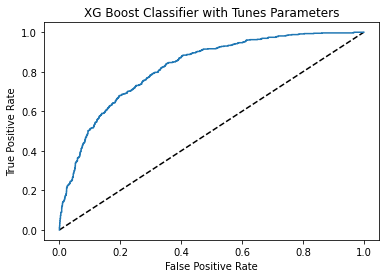

In [97]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,label='Gaussian NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian NB with Tuned Parameters')
plt.show()

In [98]:
# Checking Auc Score

auc_score=roc_auc_score(y_test,y_pred_prob)*100
auc_score

82.27284489603079

Hyper Tuning Ada Boost Classifier

In [88]:
# For ADA Boost

params_ada = {'n_estimators':list(range(50,400,50)), 'learning_rate' :[0.01,0.1,0.2,0.3]}
ada_p = GridSearchCV(estimator=adb,param_grid=params_ada, cv=5, scoring='accuracy') 
ada_p.fit(x_train, y_train)

ada_p.best_params_

{'learning_rate': 0.2, 'n_estimators': 200}

In [89]:
# AdaBoostClassifier

adb1=AdaBoostClassifier(learning_rate= 0.2, n_estimators= 200)
adb1.fit(x_train,y_train)
adb1_pred=adb1.predict(x_test)
testing_accu=accuracy_score(y_test,adb1_pred)*100
for k in range(2,10):
    cv_score=cross_val_score(adb1,x,y,cv=k)
    cv_mean=cv_score.mean()*100
    print(f'At crossfold {k} the CV score of is {cv_mean} and the accuracy for testing is {testing_accu} ')
    print('\n')

At crossfold 2 the CV score of is 80.09366531402966 and the accuracy for testing is 82.15053763440861 


At crossfold 3 the CV score of is 80.46286208280678 and the accuracy for testing is 82.15053763440861 


At crossfold 4 the CV score of is 80.26413517629446 and the accuracy for testing is 82.15053763440861 


At crossfold 5 the CV score of is 80.46291292986645 and the accuracy for testing is 82.15053763440861 


At crossfold 6 the CV score of is 80.44878544460273 and the accuracy for testing is 82.15053763440861 


At crossfold 7 the CV score of is 80.26395464635932 and the accuracy for testing is 82.15053763440861 


At crossfold 8 the CV score of is 80.29255559281808 and the accuracy for testing is 82.15053763440861 


At crossfold 9 the CV score of is 80.44866455661058 and the accuracy for testing is 82.15053763440861 




In [105]:
# Plotting Curve for AdaBoost Classifier with tuned parameters

y_pred_prob=adb1.predict_proba(x_test)[:,1]
fpr2,tpr2,thresholds=roc_curve(y_test,y_pred_prob)

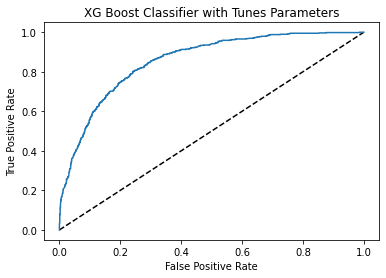

In [103]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr2,tpr2,label='Ada Boost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ada Boost with Tuned Parameters')
plt.show()

In [104]:
# Checking Auc Score

auc_score=roc_auc_score(y_test,y_pred_prob)*100
auc_score

85.58408791949861

We observe increase in accuracy in both model with very near overfitting. ADA boost gives us better coverage of data thus we will train outr final model with ADA Boost

In [109]:
# AdaBoostClassifier

adb=AdaBoostClassifier(learning_rate= 0.2, n_estimators= 200)
adb.fit(x_train,y_train)
adb_pred=adb.predict(x_test)
testing_accu=accuracy_score(y_test,adb_pred)*100

print('Accuracy for the model is : ',testing_accu,'\n')
print('-------------------------------')
print('Confusion Matrix is as follows : \n',confusion_matrix(y_test,adb_pred),'\n')
print('-------------------------------')
print('Classification Report is : \n',classification_report(y_test,adb_pred),'\n')
print('-------------------------------')
print('F1 score is : ',f1_score(y_test,adb_pred)*100)

Accuracy for the model is :  82.15053763440861 

-------------------------------
Confusion Matrix is as follows : 
 [[1574  164]
 [ 251  336]] 

-------------------------------
Classification Report is : 
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1738
         1.0       0.67      0.57      0.62       587

    accuracy                           0.82      2325
   macro avg       0.77      0.74      0.75      2325
weighted avg       0.81      0.82      0.82      2325
 

-------------------------------
F1 score is :  61.82152713891445


# Saving Final Model

In [111]:
import pickle
filename='telecom_churn.pkl'
pickle.dump(adb,open(filename,'wb'))

# Conclusion

In [112]:
load_model=pickle.load(open('telecom_churn.pkl','rb'))
result=load_model.score(x_test,y_test)*100
print(result)

82.15053763440861


In [114]:
# Creating a dataframe with Predicted and Original results

conclusion=pd.DataFrame([load_model.predict(x_test)[:],adb_pred[:]],index=['Predicted','Original'])
conclusion

0     1     2     3     4     5     6     7     8     9     10    \
Predicted   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
Original    0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

           11    12    13    14    15    16    17    18    19    20    21    \
Predicted   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
Original    0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

           22    23    24    25    26    27    28    29    30    31    32    \
Predicted   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   
Original    0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   

           33    34    35    36    37    38    39    40    41    42    43    \
Predicted   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
Original    1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   

           44    45    46    47    48    49    50    51    52    53    54    \
Predicted   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Original    1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

           55    56    57    58    59    60    61    62    63    64    65    \
Predicted   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
Original    0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   

           66    67    68    69    70    71    72    73    74    75    76    \
Predicted   0.0   0.0   1.0   1.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   
Original    0.0   0.0   1.0   1.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   

           77    78    79    80    81    82    83    84    85    86    87    \
Predicted   0.0   1.0   1.0   0.0   1.0   1.0   0.0   1.0   1.0   1.0   1.0   
Original    0.0   1.0   1.0   0.0   1.0   1.0   0.0   1.0   1.0   1.0   1.0   

           88    89    90    91    92    93    94    95    96    97    98    \
Predicted   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
Original    0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   

           99    100   101   102   103   104   105   106   107   108   109   \
Predicted   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
Original    0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   

           110   111   112   113   114   115   116   117   118   119   120   \
Predicted   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
Original    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   

           121   122   123   124   125   126   127   128   129   130   131   \
Predicted   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   
Original    1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   

           132   133   134   135   136   137   138   139   140   141   142   \
Predicted   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
Original    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   

           143   144   145   146   147   148   149   150   151   152   153   \
Predicted   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0   1.0   
Original    0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0   1.0   

           154   155   156   157   158   159   160   161   162   163   164   \
Predicted   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
Original    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   

           165   166   167   168   169   170   171   172   173   174   175   \
Predicted   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   
Original    0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   

           176   177   178   179   180   181   182   183   184   185   186   \
Predicted   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   
Original    0.0   1.0   1.0   0.0   0.0   0.0